# Pycaret
## ¿Qué es Pycaret?
Librería de Python que nos brinda herramientas low code, para desarrollar desde el procesamiento de los datos, hasta el despliegue de un modelo en cuestión de minutos, y unas pocas lineas de código.

In [1]:
# definir el entorno virtual
!python3 -m venv env

# activar el entorno virtual
!source env/bin/activate

# instalar las dependencias de pycaret
!pip install pycaret[full]

  Using cached interpret-0.6.3-py3-none-any.whl.metadata (1.1 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached PyYAML-5.3.1.tar.gz (269 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      /home/juanme/anaconda3/envs/hackday2/lib/python3.11/site-packages/setuptools/config/setupcfg.py:293: _DeprecatedConfig: Deprecated config in `setup.cfg`
      !!
      
              ********************************************************************************
              The license_file parameter is deprecated, use license_files instead.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              **********

> 💡 **Antes de comenzar:**
>
> - PyCaret tiene dos enfoques, el functional API y el OOP API. En este taller nos vamos a enfocar en el functional API, ya que esta nos permite un desarrollo rápido y sencillo. En proyectos de mayor rigor, que necesiten mayor modularidad y encapsulamiento, puede ser idóneo el OOP API.


## Setup
Esta función incializa el ambiente y crea los pipelines de transformación, todo según los parámetros pasados a una función de PyCaret.

Algúnos de los parámetros que podemos pasar son:
- Session_id : Análogo al random state, reproduciibilidad
- categorical_features : permite especificar qué features del dataset son catgóricos.
- normalize : Normalizar según el `normalize_method` (otro parametro)
- Transformation: Transforma los datos según el `transformation method` (también hay target transform)
- Polynomial_features : bool, Polynomial_degree, default 2
- train_size : proporcion del dataset a usar en train y el resto en validación
- fold_strategy : string o sklearn cv generator object : permite escoger el método de validación cruzada a usar en el entrenamiento.
- n_jobs : para las funciones que soportan procesamiento en paralelo.
- use_gpu : suponga que usted teine una 4090 y la quiere quemar con un modelo que sepa predecir el area de un cuadrado basados en su largo y ancho, bueno, aquí usted pone `True`
- Log Experiment (sorpresa para mas adelante)

In [2]:
# Importar las librerias de pycaret
from pycaret.classification import *
import pandas as pd

# Cargar los datos
data = pd.read_csv("../muestra/data/raw/recruitment_data.csv")

# Inicializar el entorno de pycaret	
clf_setup = setup(
                data, 
                target = 'HiringDecision',
                session_id = 0, 
                train_size=0.1, 
                )

,Description,Value
0,Session id,0
1,Target,HiringDecision
2,Target type,Binary
3,Original data shape,"(1500, 11)"
4,Transformed data shape,"(1500, 11)"
5,Transformed train set shape,"(150, 11)"
6,Transformed test set shape,"(1350, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


**Notemos que:**

- Tenemos las formas del dataset antes y después del preprocesamiento
- Tenemos la cantidad de variables (numéticas)
- Tenemos la imputación para cada tipo de dato, numerico y categórico
- Generador de folds para cross validation
- Y tenemos unas cosas ahí que dicen Experiment, pero eso lo veremos mas adelante. 🪄

In [3]:
# Visualizar los datos de entrenamiento preprocesados
clf_setup.X_train_transformed


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
583,37.0,1.0,2.0,11.0,3.0,13.754672,69.0,73.0,71.0,2.0
1383,49.0,1.0,2.0,10.0,2.0,30.072697,29.0,19.0,17.0,1.0
477,20.0,0.0,4.0,8.0,3.0,10.143227,19.0,53.0,82.0,3.0
1426,27.0,0.0,1.0,2.0,2.0,14.470895,76.0,62.0,77.0,1.0
718,48.0,0.0,2.0,15.0,1.0,28.283434,25.0,43.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...
64,44.0,0.0,1.0,14.0,5.0,41.255844,74.0,21.0,36.0,2.0
1358,24.0,0.0,2.0,3.0,5.0,1.505722,11.0,99.0,40.0,2.0
1094,39.0,0.0,4.0,15.0,1.0,4.831120,58.0,99.0,86.0,1.0
1212,43.0,1.0,2.0,0.0,1.0,47.333279,99.0,92.0,27.0,3.0


**Además:** podemos ver el comportamiento de estas funciones si implementamos los datos categóricos.

> ⚠️ **Ordinal Features** permite especificar cuando una variable no solo es categórica sino también ordinal.  
> **Ejemplo**: `ordinal_features = {'salary' : ['low', 'medium', 'high']}`


In [4]:
# Definir setup con variables categóricas
clf_setup = setup(
                data, 
                target = 'HiringDecision',
                session_id = 0, 
                categorical_features = ['Gender', 'EducationLevel'], 
                train_size=0.1, 
                polynomial_features=True, 
                normalize=True
                )

,Description,Value
0,Session id,0
1,Target,HiringDecision
2,Target type,Binary
3,Original data shape,"(1500, 11)"
4,Transformed data shape,"(1500, 105)"
5,Transformed train set shape,"(150, 105)"
6,Transformed test set shape,"(1350, 105)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


**Ahora no solo podemos ver lo anterior, sino también cosas como:**

- Cómo cambió la forma del dataset de original a transformed
- Cantidad de numéricas y de categóricas
- Tipo de imputación para cada variable
- Cantidad de polynomial features
- Tipo de normalización

In [5]:
# visualizar los datos de entrenamiento preprocesados
clf_setup.X_train_transformed

,Age,Gender,EducationLevel_2.0,EducationLevel_4.0,EducationLevel_1.0,EducationLevel_3.0,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,...,InterviewScore^2,InterviewScore SkillScore,InterviewScore PersonalityScore,InterviewScore RecruitmentStrategy,SkillScore^2,SkillScore PersonalityScore,SkillScore RecruitmentStrategy,PersonalityScore^2,PersonalityScore RecruitmentStrategy,RecruitmentStrategy^2
583,0.214011,1.175139,1.098127,-0.403473,-0.531085,-0.47907,0.642499,-0.039594,-0.739993,0.807228,...,0.647937,1.285409,1.193294,0.830329,0.570669,1.104920,0.870517,0.517786,0.662935,0.038662
1383,1.502375,1.175139,1.098127,-0.403473,-0.531085,-0.47907,0.441299,-0.699491,0.384161,-0.581751,...,-0.733727,-0.775546,-0.904537,-0.873685,-0.982466,-1.041471,-1.121477,-1.105477,-1.209340,-1.121205
477,-1.611170,-0.850963,-0.910642,2.478479,-0.531085,-0.47907,0.038899,-0.039594,-0.988787,-0.928995,...,-0.902910,-0.566050,-0.397458,-0.435957,-0.217153,0.735264,1.074422,1.092692,2.220668,1.971774
1426,-0.859624,-0.850963,-0.910642,-0.403473,1.882938,-0.47907,-1.168303,-0.699491,-0.690652,1.050300,...,1.005689,1.136098,1.647046,-0.138927,0.106416,0.924288,-0.447022,0.821124,-0.310648,-1.121205
718,1.395011,-0.850963,1.098127,-0.403473,-0.531085,-0.47907,1.447300,-1.359388,0.260898,-0.720649,...,-0.809859,-0.534810,-1.067849,-0.545389,-0.517276,-1.070178,-0.070582,-1.191901,-1.284231,0.038662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.965557,-0.850963,-0.910642,-0.403473,1.882938,-0.47907,1.246100,1.280200,1.154573,0.980851,...,0.899949,-0.314748,0.129142,0.986661,-0.957456,-0.850239,-0.760722,-0.761490,-0.385539,0.038662
1358,-1.181715,-0.850963,1.098127,-0.403473,-0.531085,-0.47907,-0.967102,1.280200,-1.583828,-1.206791,...,-0.987501,-0.528378,-0.929771,-0.983117,1.968741,0.564789,1.686136,-0.657645,-0.265713,0.038662
1094,0.428739,-0.850963,-0.910642,2.478479,-0.531085,-0.47907,1.447300,-1.359388,-1.354740,0.425259,...,0.155543,1.609300,1.235669,-0.420323,1.968741,2.576037,0.133322,1.322245,-0.175844,-1.121205
1212,0.858193,1.175139,1.098127,-0.403473,-0.531085,-0.47907,-1.570703,-1.359388,1.573249,1.848962,...,2.424361,3.155705,0.133428,3.316001,1.550757,-0.087078,2.909565,-0.955175,-0.250735,1.971774


Ahora, exportemos el modelo ...

In [6]:
# Guardar el pipeline
pipe = clf_setup.pipeline

In [7]:
# Ahora usemos el pipeline pipe en los datos x, y sin transformar

# Definir X, y
X, y = data.drop('HiringDecision', axis=1), data['HiringDecision']

# Ajustar el pipeline
pipe.fit(X, y)

# Ver el resultado
pipe.transform(X, y)

(           Age    Gender  EducationLevel_2.0  EducationLevel_4.0  \
 0    -0.989083  1.016130            1.013423           -0.315764   
 1     0.416376  1.016130           -0.986754            3.166925   
 2     1.389387 -0.984126            1.013423           -0.315764   
 3    -0.124185  1.016130            1.013423           -0.315764   
 4    -0.556634 -0.984126           -0.986754           -0.315764   
 ...        ...       ...                 ...                 ...   
 1495  1.389387 -0.984126            1.013423           -0.315764   
 1496 -0.880971  1.016130            1.013423           -0.315764   
 1497 -1.205308  1.016130           -0.986754           -0.315764   
 1498  1.389387 -0.984126            1.013423           -0.315764   
 1499 -0.124185  1.016130            1.013423           -0.315764   
 
       EducationLevel_1.0  EducationLevel_3.0  ExperienceYears  \
 0              -0.507281           -0.517651        -1.658237   
 1              -0.507281           -0

In [8]:
# Importar la libreria joblib
import joblib

# Exportar el pipeline
joblib.dump(pipe, 'pipeline_only.pkl')

['pipeline_only.pkl']

## Train y optimize
Volviendo al problema inicial, pycaret nos permite realizar la comparación de varios modelos de machine learning, y seleccionar el mejor modelo según una métrica de evaluación.

In [9]:
# Obtener los mejores tres modelos
best = compare_models(n_select=  3, turbo=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:22:39
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8400,0.0000,0.6350,0.8117,0.6932,0.5906,0.6114,0.0680
et,Extra Trees Classifier,0.8400,0.0000,0.6550,0.7900,0.7067,0.5993,0.6105,0.0650
lr,Logistic Regression,0.8333,0.0000,0.7250,0.7405,0.7177,0.6023,0.6135,0.3480
gbc,Gradient Boosting Classifier,0.8267,0.0000,0.6800,0.7567,0.7035,0.5823,0.5928,0.0890
ada,Ada Boost Classifier,0.8200,0.0000,0.7050,0.7705,0.7041,0.5803,0.6074,0.0490
lightgbm,Light Gradient Boosting Machine,0.8200,0.0000,0.7000,0.7096,0.6830,0.5612,0.5771,0.3450
svm,SVM - Linear Kernel,0.8133,0.0000,0.6800,0.6583,0.6638,0.5395,0.5401,0.0280
dt,Decision Tree Classifier,0.7933,0.0000,0.6950,0.6545,0.6636,0.5150,0.5229,0.0310
ridge,Ridge Classifier,0.7800,0.0000,0.6100,0.6567,0.6216,0.4673,0.4754,0.0310
lda,Linear Discriminant Analysis,0.7667,0.0000,0.6350,0.6355,0.6238,0.4549,0.4648,0.0250


In [10]:
# Ver el contenido de la variable best
best

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_scor

> ⏰ **Notemos que esto podría quedarse un buen rato en este proceso**  
> ¿Cómo hacemos que sea exclusivamente para los modelos que no tienen un tiempo de entrenamiento muy alto?
>
> **Turbo:** solo entrena los modelos que no suelen tomar mucho tiempo en entrenarse.  
> **budget_time:** tiempo límite para el entrenamiento, si se pone, la función parará en el punto que pase el tiempo.


Ahora ¿Y si quisieramos entrenar un modelo en especifico?

In [11]:
# Crear modelo de random forest
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.5556,0.7143,0.6250,0.4915,0.4987
1,0.8000,0.0000,0.5556,0.7143,0.6250,0.4915,0.4987
2,0.8333,0.0000,0.5556,0.8333,0.6667,0.5614,0.5819
3,0.8000,0.0000,0.8000,0.6667,0.7273,0.5714,0.5774
4,0.8667,0.0000,0.7000,0.8750,0.7778,0.6842,0.6929
Mean,0.8200,0.0000,0.6333,0.7607,0.6843,0.5600,0.5699
Std,0.0267,0.0000,0.1004,0.0794,0.0599,0.0706,0.0714


**Y luego de tener estos modelos, con estas métricas ¿Cómo los podríamos optimizar?**

por ejemplo, supongamos que nuestro problema requiere de optimizar la métrica de f1

In [12]:
# Tunear el modelo de random forest
tuned_rf = tune_model(rf, optimize='f1', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.0000,0.2500,0.5000,0.3333,0.1892,0.2070
1,0.8667,0.0000,0.7500,0.7500,0.7500,0.6591,0.6591
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,0.0000,0.6000,0.7500,0.6667,0.5263,0.5330
4,0.8667,0.0000,0.8000,0.8000,0.8000,0.7000,0.7000
5,0.8667,0.0000,0.8000,0.8000,0.8000,0.7000,0.7000
6,0.7333,0.0000,0.8000,0.5714,0.6667,0.4545,0.4725
7,0.8000,0.0000,0.8000,0.6667,0.7273,0.5714,0.5774
8,0.9333,0.0000,0.8000,1.0000,0.8889,0.8421,0.8528


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Además se pueden usar librerías adicionales para aprovechar sus algoritmos de búsqueda

In [13]:
# tunear el modelo con optuna
tuned_with_optuna = tune_model(
					rf, 
					search_library = 'optuna',
					optimize='f1',
					choose_better= True
					)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.0000,0.2500,0.5000,0.3333,0.1892,0.2070
1,0.8667,0.0000,0.7500,0.7500,0.7500,0.6591,0.6591
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8667,0.0000,0.8000,0.8000,0.8000,0.7000,0.7000
4,0.8667,0.0000,0.8000,0.8000,0.8000,0.7000,0.7000
5,0.9333,0.0000,0.8000,1.0000,0.8889,0.8421,0.8528
6,0.7333,0.0000,0.8000,0.5714,0.6667,0.4545,0.4725
7,0.8667,0.0000,1.0000,0.7143,0.8333,0.7273,0.7559
8,0.8667,0.0000,0.6000,1.0000,0.7500,0.6667,0.7071


Por último, para finalizar el entrenamiento se usa el finalize_model, lo cual reentrenará el modelo tuneado (con hiperparámetros óptimos) con el conjunto de datos completo.

In [14]:
# finalizar el modelo
final_rf  = finalize_model(tuned_with_optuna)

Exportemos el modelo con el formato 'final_model_Y_m_d'.

In [15]:
# Definir el guardado del experimento

# Importar la libreria os y datetime
import os
from datetime import datetime

# Crear la ruta al directorio "models" en el directorio padre
ruta_modelos = os.path.join(os.path.pardir, 'muestra/models')
os.makedirs(ruta_modelos, exist_ok=True)

# Generar el nombre del archivo con la fecha actual
fecha_actual = datetime.now().strftime("%Y%m%d")
nombre_archivo = f'final_model_{fecha_actual}'

# Ruta completa para guardar el archivo
ruta_completa = os.path.join(ruta_modelos, nombre_archivo)

# Guardar el modelo en la ruta especificada
save_model(rf, ruta_completa)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'ExperienceYears',
                                              'PreviousCompanies',
                                              'DistanceFromCompany',
                                              'InterviewScore', 'SkillScore',
                                              'PersonalityScore',
                                              'RecruitmentStrategy'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing...
                  RandomForestClassifier(boots

Con esto, logramos que el modelo quede guardado en la carpeta models, con la fecha en el que fue entrenado.

## Analyze
Para ver todas las métricas sobre el modelo, existen diversos métodos gráficos, los cuales nos ofrece pycaret por medio de la función plot_model.
A esta se le pueden pasar distintos parámetros, como los siguientes:
- plot :
    - 'confusion_matrix'
    - 'feature'

Veamos por ejemplo la matriz de confusión del modelo entrenado.

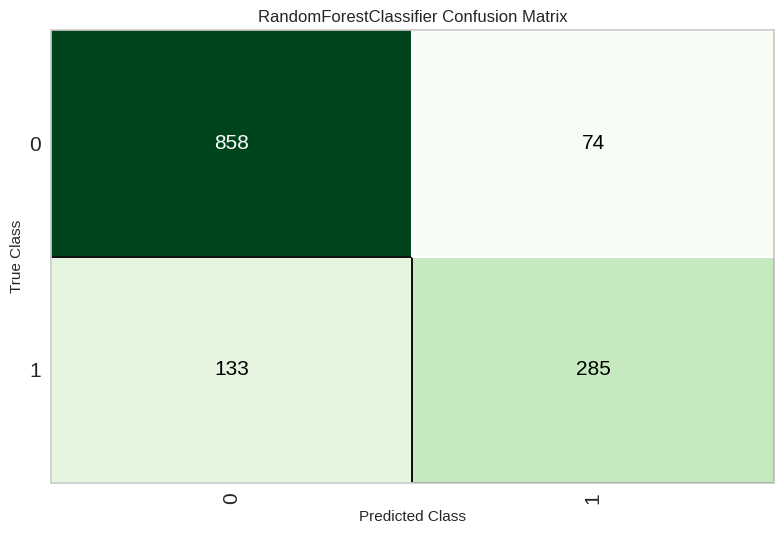

In [16]:
# Uso del parametro plot = confusion_matrix
plot_model(rf, plot='confusion_matrix')

Pycaret También nos permite analizar la importancia de las variables en el modelo, por medio del parametro 'feature'.

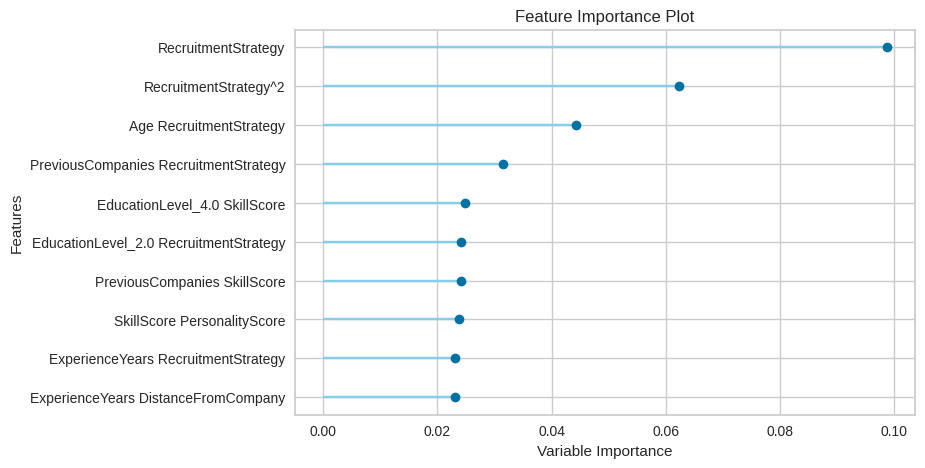

In [17]:
# Uso del parametro plot = feature
plot_model(rf, plot='feature')

Además de esta función, existe la función interpret_model, la cual nos permite ver la importancia de las variables en el modelo, pero de una forma más detallada, para cada registro.

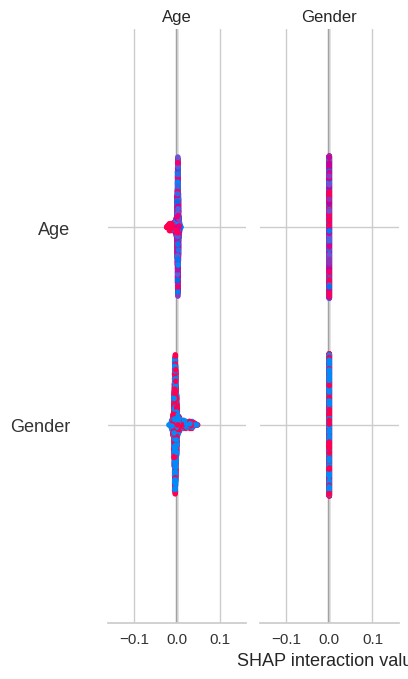

In [18]:
interpret_model(rf)

Finalmente, todas estas funciones se pueden visualizar en un solo paso, con la función evaluate_model.

In [19]:
# llamada a la función evaluate_model
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…